<h4><em>Обробка та аналіз БМД Лабораторна 7 Кононов Антон БС-82</em></h4>
<h5>Дисперсійний аналіз</h5>

Завдання:
1. Розрахувати та вивести у вигляді таблиці статистичні характиристики даних (середні та стандартні відхилення для кожної з груп).

In [74]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Розглянемо дані "ІT компанії". У них наведено дані про кількість виконаних проектів за 1 рік в залежності від кількості співробітників цієї компанії в Україні. Передбачається, що всі три ІТ компанії знаходяться в однакових умовах.


In [162]:
col1 = [25, 21, 28, 27]
col2 = [47, 51, 50, 49]
col3 = [40, 58, 52, 44]
col = ["1 квартал", "2 квартал", "3 квартал", "4 квартал"]
data = pd.DataFrame({"< 500": col1, "500 < 1000": col2, "1000 >": col3}, index = col)
data

,< 500,500 < 1000,1000 >
1 квартал,25,47,40
2 квартал,21,51,58
3 квартал,28,50,52
4 квартал,27,49,44


In [163]:
s1 = round((data['< 500'].mean()), 2)
s2 = round((data['500 < 1000'].mean()), 2)
s3 = round((data['1000 >'].mean()), 2)
sd1 = round((data['< 500'].std()), 2)
sd2 = round((data['500 < 1000'].std()), 2)
sd3 = round((data['1000 >'].std()), 2)

df = pd.DataFrame({"< 500": col1, "500 < 1000": col2, "1000 >": col3}, index = col)
df.loc["Середнє:"] = [s1, s2, s3]
df.loc["Стандартне відхилення:"] = [sd1,sd2,sd3]
df

,< 500,500 < 1000,1000 >
1 квартал,25.00,47.00,40.00
2 квартал,21.00,51.00,58.00
3 квартал,28.00,50.00,52.00
4 квартал,27.00,49.00,44.00
Середнє:,25.25,49.25,48.50
Стандартне відхилення:,3.10,1.71,8.06


2. Побудувати графік розкиду в групах.

[]

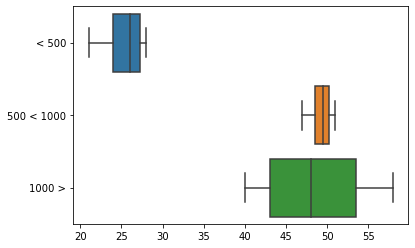

In [164]:
sns.boxplot(data=data, orient='h').set()

3. Побудувати функцію, що реалізовує однофакторний дисперсійний аналіз.

In [165]:
def Dispersia(data):
    c = len(data.iloc[0,:])
    n = data.shape[0]
    Tc = 0
    Tc2 = 0
    sum1 = 0
    for i in range(c):
        Tc = data.iloc[:, i].sum()
        sum1 += Tc
        Tc2 += (Tc)**2
    N = n*3
    sum1 = sum1**2
    sum2 = 0
    
    for i in range (c):
        for j in range(len(data.iloc[:, i-1])):
            sum2 += (data.iloc[j][i])**2

    const = sum1 / N
    
    SSfact = Tc2/n - const
    SSzag = sum2 - const
    SSvyp = SSzag - SSfact
    
    dfact = c - 1
    dzag = N - 1
    dvyp = dzag - dfact
    
    MSfact = SSfact / dfact
    MSvyp = SSvyp / dvyp

    Fempir = MSfact / MSvyp

    
    if((dvyp >= 24) and (dvyp < 26)):
        dvyp = 24
    elif((dvyp >= 26) and (dvyp < 28)):
        dvyp = 26
    elif((dvyp >= 28) and (dvyp < 30)):
        dvyp = 28
    elif((dvyp >= 30) and (dvyp < 40)):
        dvyp = 30
    elif((dvyp >= 40) and (dvyp < 60)):
        dvyp = 40
    elif((dvyp >= 60) and (dvyp <= 120)):
        dvyp = 60
    elif((dvyp >=  120) and (dvyp <=  130)):
        dvyp = 120
    elif(dvyp > 130):
        dvyp = ">130"
    
    if((n >= 10) and (n < 15)):
        dfact  = 10
    elif((n >= 15) and (n < 20)):
        dfact  = 15
    elif((n >= 20) and (n < 30)):
        dfact  = 20
    elif((n >= 30) and (n <= 40)):
        dfact  = 30
    elif(n > 40):
        dfact  = ">40"
    critical_table = pd.read_excel("_Таблиця критичних значень для критерію Фішера.xlsx", index_col = 0)
    critical_table = critical_table[dvyp][dfact]
    if(Fempir >= critical_table):
        result = "Нульова гіпотеза про рівність середніх відхиляється, рівність середніх не підтверджена"
    else:
        result = "Нульова гіпотеза про рівність середніх приймається, рівність середніх підтверджена"
    table = pd.DataFrame({
        "Характеристика" : ['Внутрішньогрупова дисперсія ($SS_{факт}$)','Загальногрупова дисперсія ($SS_{заг}$)', 'Випадкова (залишкова) величина $SS_{вип}$',
                           'Kількість ступенів свободи: $d_{факт} = c - 1:$' ,'Kількість ступенів свободи: $d_{заг} = N - 1 :$' , 'Kількість ступенів свободи: $d_{вип}$', '$MS_{факт}: $', '$MS_{вип}: $',
                           'Значення $F_{емпір}$: ','Kритичне значення $F_{крит}$:', "Результат"],
        "Обчислене значення" : [ str(round(SSfact,2)) , str(round(SSzag,2)) ,str(round(SSvyp,2)),str(dfact),str(dzag), str(dvyp), str(round(MSfact,2)),str(round(MSvyp,2)),str(round(Fempir,2)), str(critical_table), result]
    }) 
    return table    

4. Вивести результати розрахунку кожного з етапів вказаних вище у вигляді таблиці.

In [166]:
Dispersia(data)

,Характеристика,Обчислене значення
0,Внутрішньогрупова дисперсія ($SS_{факт}$),1489.5
1,Загальногрупова дисперсія ($SS_{заг}$),1722.0
2,Випадкова (залишкова) величина $SS_{вип}$,232.5
3,Kількість ступенів свободи: $d_{факт} = c - 1:$,2
4,Kількість ступенів свободи: $d_{заг} = N - 1 :$,11
5,Kількість ступенів свободи: $d_{вип}$,9
6,$MS_{факт}: $,744.75
7,$MS_{вип}: $,25.83
8,Значення $F_{емпір}$:,28.83
9,Kритичне значення $F_{крит}$:,19.38


5. Зробити висновок.

Під час дисперсійного аналізу було отримано результат, що дозволяє відхилити нульову гіпотезу про рівність середніх, рівність середніх не підтверджена.
Тому приймаємо альтернативну гіпотезу про їх відмінність, так як розрахований критерій Фішера виявився ільшим за критичний для відповідних ступеней свободи.
У нашому випадку альтернативна гіпотеза стверджує, що середні значення обсягів виконаних проектів різрізняються не випадково, з чого випливає, що кількість працівників впливає на продуктивність компанії.